# Getting started

Install the requirements:

In [4]:
!python3 -m pip install -r requirements.txt

     |████████████████████████████████| 108 kB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/ozlemyildiz/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [92]:
# this should now run
import kaggle_environments

In [93]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils

If any problems were encountered, [this](https://www.kaggle.com/antimatter543/running-games-locally-with-jupyter-notebook) post has some info on running Kaggle locally

Useful information:

```python
# Setup a hungry_geese environment and run agent vs a random.
# Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env = make("hungry_geese", debug=True) 

# each element in the list is a different opponent
env.run([agent, agent,agent, agent])

# visualize the environment
env.render(mode="ipython", width=500, height=450)
```

Creates a simple random agent

In [94]:
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])

def random_agent(obs, config):
    return np.random.choice(actions)

random_agent({}, {})

'WEST'

In [147]:
# Setup a hungry_geese environment and run agent vs a random.
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env.run([random_agent, random_agent, random_agent, random_agent])
env.render(mode="ipython", width=500, height=450)

Opposite action: (0, <Action.EAST: 2>, <Action.WEST: 4>)
Opposite action: (2, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Opposite action: (3, <Action.WEST: 4>, <Action.EAST: 2>)


As we can see above, a random agent is quite bad, since it sometimes goes back onto itself, therefore losing; we can do slightly better:

In [96]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}

# Creates a class for an agent so we can keep track of the last action
class RandomAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, observation: Observation):
        action = np.random.choice(actions) 
        while action == opp_actions.get(self.last_action, ""):
            action = np.random.choice(actions)
        self.last_action = action
        return action

cached_agents = {}
def agent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = RandomAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

This gives us much better results (at least we don't go backwards):

In [64]:
env.run([agent, agent])
env.render(mode="ipython", width=500, height=450)

Goose Collision: EAST


Below is to understand which agent is which color:

Results: White, Blue, Green, Red 

But you need to pass as : env.run([southagent, northagent, eastagent, westagent]) 


In [138]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}
tryi = actions[actions != 'EAST']



# Creates a class for an agent so we can keep track of the last action
class SouthAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'SOUTH'
        return action

    
    
cached_agents = {}
def southagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = SouthAgent(Configuration(config))
    return cached_agents[index](Observation(obs))



# Creates a class for an agent so we can keep track of the last action
class NorthAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'NORTH'
        return action

    
    
cached_agents = {}
def northagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = NorthAgent(Configuration(config))
    return cached_agents[index](Observation(obs))


class EastAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'EAST'
        return action

    
    
cached_agents = {}
def eastagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = EastAgent(Configuration(config))
    return cached_agents[index](Observation(obs))



# Creates a class for an agent so we can keep track of the last action
class WestAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, obs):
        action = 'WEST'
        return action

    
    
cached_agents = {}
def westagent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = WestAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

In [155]:
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env.run([southagent, northagent, eastagent, westagent]) 
#ORDER: white,blue,green,red
env.render(mode="ipython", width=500, height=450)

Goose Collision: SOUTH
Goose Collision: WEST
Goose Collision: NORTH
Goose Collision: EAST


In [143]:
from kaggle_environments.envs.hungry_geese.hungry_geese import GreedyAgent
cached_greedy_agents = {}

def greedy_agent(obs, config):
    index = obs["index"]
    if index not in cached_greedy_agents:
        cached_greedy_agents[index] = GreedyAgent(Configuration(config))
    return cached_greedy_agents[index](Observation(obs))


agents = {random_agent, agent, greedy_agent}

In [160]:
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
steps = env.run([greedy_agent,random_agent, agent])  
#print(steps)
out = env.render(mode="ipython", width=500, height=450)

Opposite action: (1, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Goose Starved: Action.EAST
[{'action': 'EAST', 'reward': 8101, 'info': {}, 'observation': {'remainingOverageTime': 60, 'step': 80, 'geese': [[59], [], []], 'food': [33, 24], 'index': 0}, 'status': 'DONE'}, {'action': 'NORTH', 'reward': 702, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 1}, 'status': 'DONE'}, {'action': 'EAST', 'reward': 8001, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 2}, 'status': 'DONE'}]


Below is the demonstration of the reward for three different agents

In [187]:
print(steps[-1][2])

{'action': 'EAST', 'reward': 5002, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 2}, 'status': 'DONE'}


In [181]:
nOfTrial =100;
env = make("hungry_geese", debug=False) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)

greedyR = np.zeros(nOfTrial)
randomR = np.zeros(nOfTrial)
agentR = np.zeros(nOfTrial)

for i in range(nOfTrial):
    steps = env.run([greedy_agent,random_agent, agent])  
    greedyR[i] = steps[-1][0]['reward']
    randomR[i] = steps[-1][1]['reward']
    agentR[i] = steps[-1][2]['reward']


Text(0, 0.5, 'Reward')

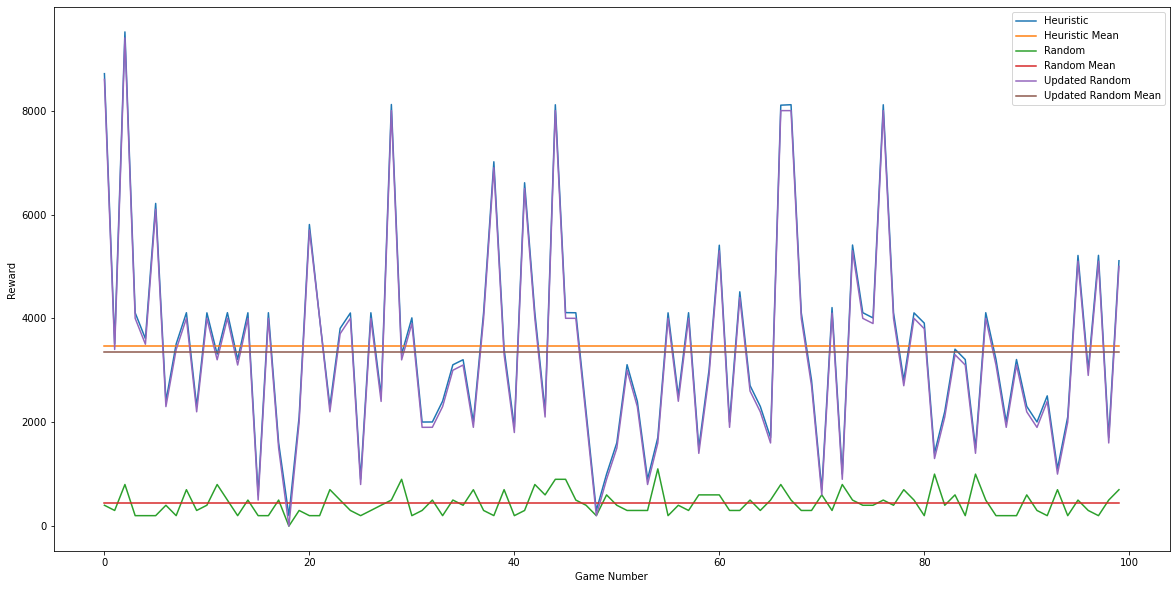

In [186]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,10))
plt.plot(greedyR)
plt.plot(np.mean(greedyR)*np.ones(nOfTrial))
plt.plot(randomR)
plt.plot(np.mean(randomR)*np.ones(nOfTrial))
plt.plot(agentR)
plt.plot(np.mean(agentR)*np.ones(nOfTrial))
plt.legend(['Heuristic','Heuristic Mean','Random', 'Random Mean', 'Updated Random', 'Updated Random Mean'])
plt.xlabel('Game Number')
plt.ylabel('Reward')

In [193]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [greedy_agent,random_agent, agent]

# How many times to run them.
num_episodes = 100

rewards = evaluate(environment, agents, configuration, steps, num_episodes)


AttributeError: 'list' object has no attribute 'shape'

(100, 3)


Text(0.5, 1.0, 'Agent Comparison')

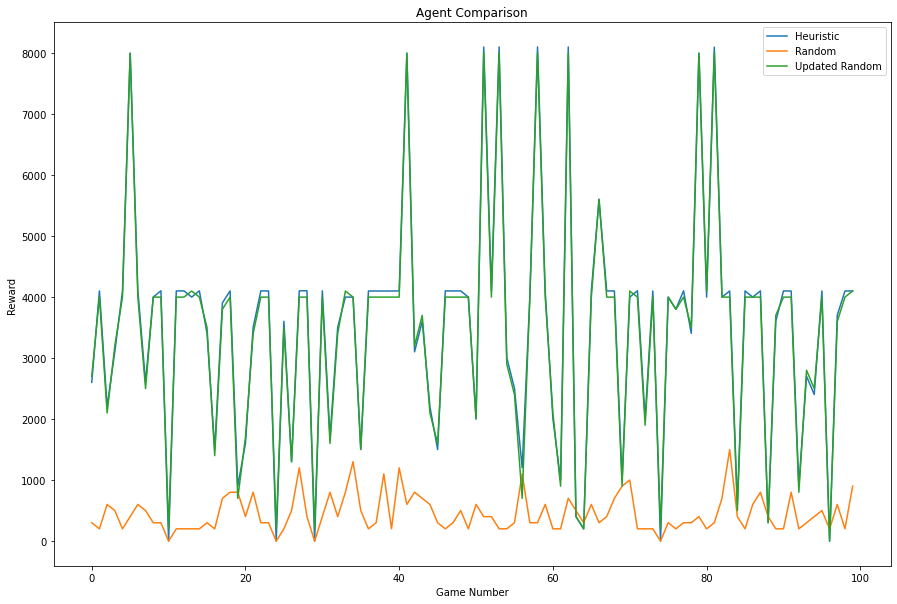

In [216]:
rewards = np.array(rewards)
print(rewards.shape)

fig = plt.figure(figsize=(15,10))

plt.plot(rewards[:,0])
plt.plot(rewards[:,1])
plt.plot(rewards[:,2])

plt.legend(['Heuristic', 'Random' , 'Updated Random'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

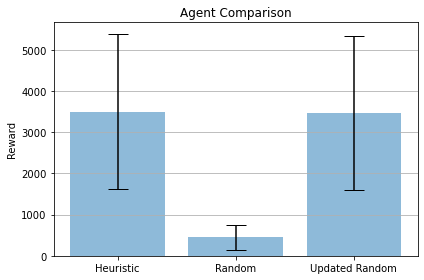

In [214]:
means = np.mean(rewards, 0)
stds = np.std(rewards, 0)
agents = ['Heuristic', 'Random', 'Updated Random']
x_pos = np.arange(len(agents))



# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()


In [217]:
print(env.state)

[{'action': 'EAST', 'reward': 5110, 'info': {}, 'observation': {'remainingOverageTime': 60, 'step': 50, 'geese': [[50, 49, 48, 47, 46, 45, 56, 67, 1, 12], [], []], 'food': [53, 35], 'index': 0}, 'status': 'DONE'}, {'action': 'NORTH', 'reward': 701, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 1}, 'status': 'DONE'}, {'action': 'EAST', 'reward': 5002, 'info': {}, 'observation': {'remainingOverageTime': 60, 'index': 2}, 'status': 'DONE'}]


For more info on the information provided in the jsons, see [this](https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/hungry_geese/hungry_geese.json) json;

Let's put that into a single python file and submit to Kaggle;

First we'll get the name of the notebook into a python variable:

In [13]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [14]:
py_name = nb_name[:-6] + ".py"  # swap out .ipynb for .py
print(py_name)

1.0-bgc-Tutorial.py


In [15]:
%%writefile $py_name

from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}

# Creates a class for an agent so we can keep track of the last action
class RandomAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, observation: Observation):
        action = np.random.choice(actions) 
        while action == opp_actions.get(self.last_action, ""):
            action = np.random.choice(actions)
        self.last_action = action
        return action

cached_agents = {}
def agent(obs, config):
    index = obs["index"]
    if index not in cached_agents :
        cached_agents[index] = RandomAgent(Configuration(config))
    return cached_agents[index](Observation(obs))

Overwriting 1.0-bgc-Tutorial.py


In [16]:
# Test the agent file
env.run(["1.0-bgc-Tutorial.py", "1.0-bgc-Tutorial.py"])
env.render(mode="ipython", width=500, height=450)

Goose Collision: EAST


That's it, just submit the py file on Kaggle! Your agent will start with 600 as it's ranking and slowly gain/lose depending on how it does.

![image.png](1.0-bgc-Tutorial.png)